# Episode 05-h: Scoping of Proofs of concepts - Artificial Bee Colony Algorithm

TODO intro

swarm

Broadly, evolutionary algorithms and related techniques use AI mechanisms inspired by biological evolution or foraging behavior in nature to solve problems, described in more detail on Wikipedia. These algorithms build from random initial populations (candidate solutions) that mutate and get better every successive generation, working towards a solution. Genetic Algorithms, Bee Colony Algorithm, Ant Colony Algorithm, Particle Swarm Algorithm (PSO), as well as the Artificial Bee Colony Algorithm belong to this class.

inspired from https://towardsdatascience.com/implementing-artificial-bee-colony-algorithm-to-solve-business-problems-cb754f3b9255

In Episode 03, some potential problem solving strategies or heuristics. Fitted out with the  classes improved in Episode 04, let's try to solve the problem.

In this Episode will be focuse on exploring different technologies and check whether it is useful for solving this problem.

We willmost of time focus on 2x2 simple problems and assume that we know a solution to the problem. The latter will simplify the problem by allowing to check if the proposed solution aquals the expected solution instead of verifying if the solution works.

**Goals for this episode:**
- Try to solve the puzzle with classes defined in Episode 04
- List potential strategies or heuristics
- Evaluate by solving simple 2x2 problem with a known solution

In [ ]:
# TODO group by categories 
?
optimizers
machine learning - NLP /transformers


use only known solutions and 2x2 here

# 1. Some initialisations

In [1]:
from episode04 import clues2x2, solution2x2, clues5x5s, solution5x5s
from episode04 import Puzzle, BoardMark, SolvedNonoGameEngine, NonoGameEngine

import numpy as np

In [ ]:
clues2x2

In [ ]:
solution2x2

https://medium.com/cesar-update/a-swarm-intelligence-approach-to-optimization-problems-using-the-artificial-bee-colony-abc-5d4c0302aaa4

Mathematically speaking, to solve a real world optimization problem using computational intelligence algorithms, we will need a mathematical representation of our problem, this representation is called Objective Function, which is a mathematical rule that describes the problem and all the decision variables within this problem.

For short, an optimization problem is defined by a search space, which is the region where we will look for a solution, a set of decision variables, which includes all the parameters that influence our problem and of course the objective function, which mathematical rules the problem and also give us a goodness measurement of a candidate solution.

The goal of an optimization problem is to find the best solution from all feasible solutions. This normally means that we want to minimize or maximize the objective function. In other words, we want to find the set of input decision variables that minimizes of maximizes the value of our objective function, also called fitness value.

The Artificial Bee Colony Algorithm

The Artificial Bee Colony (ABC) algorithm is an optimization algorithm which simulates the behavior of a bee colony and was first proposed by Karaboga in 2005 for real-parameter optimization.

In this mathematical model, our bee colony is composed of three types of bees: The Employee Bees, which will work on the collection of food to the hive at a specific food source. The Onlooker Bees, which will patrol the employees to verify when a specific food source is not worth it anymore, and the Scout Bees, which will be the ones looking for new food sources locations.

On the ABC algorithm a food source is defined as a position in the search space (a candidate solution for the optimization problem), and initially the number of food sources is equal to the number of bees on the hive. The quality of a food source is defined by the value of the objective function on that position (fitness value).

The emergent intelligent behavior from the bees can be summarized on some few steps:

    The bees start to randomly explore the environment looking for good food sources (fitness value).
    After finding a food source, the bee becomes an employee bee and begins to extract the food at the discovered source.
    The employee bee returns to the hive with the nectar and unloads the nectar. After unloading the nectar, she can go back to her discovered source site directly or she can share information about her source site by performing a dance on the dance area.
    If a food source is exhausted, the employee bee becomes a scout and starts to randomly search for a new food source.
    Onlooker bees waiting in the hive watch the employee bees on their food source collection and choose a source among the more profitable sources.
    The selection of a food source is proportional to the quality of the source (fitness value).

Even though we described three types of bees, at an implementation level we realize that there are only two types, the employees and the onlookers. The scout bee is in fact an exploratory behavior that can be performed by both employees and onlooker bees.

https://deap.readthedocs.io/en/master/

Artificial Bee

To begin the development of our algorithm we must find a way to represent our Bee agent on the python code. There are three main generic functionalities that any bee needs to have. The first one is when due to the exploratory behavior a bee moves out of our decision boundary it needs to have the ability to return to the hive. The second one is the ability to update the status of the actual food source in which the bee is working on and evaluate if a new neighborhood region its a better food source. And the last one realizes when a food source is exhausted and now the bee has to scout for some new food sources.

With that in mind, we can implement the class ArtificialBee in python as follows:

Employee Bee

The main behavior of an employee bee is to extract the food from the food source in which the employee is working on becomes exhausted. At an implementation level, this behavior can be seen as generating a new position close to where the employee bee is, and evaluating if this new position has a better amount of food. The employee bee always will memorize the best food source position achieved so far until it is exhausted.

Onlooker Bee

The onlooker bees will patrol the work of employee bees. The will fly over the hive and check the progress of their work and evaluate which employees are being more successful in gathering food.

The onlooker bees will always target the best employees, using a probabilistic approach, as a “meeting point”, where the other bees should come to this successful position with the hope to extract more food.

At an implementation level, the onlooker bees will look through the best employees and try to improve that food source. After a specific number of trials, the onlooker bee will tell to the hive that this food source is exhausted and must be discarded.

The Complete Artificial Bee Colony Algorithm

After implementing the main types of agents that are going to be used, its time to actually implement all the steps described previously with some python code.

Observe that we have implemented each step of our algorithm in separated methods. First we reset the internal parameters of ours ABC algorithm and initialize our employee bees and onlooker bees at random positions. A default strategy that is very well succeeded in real-world problems, is to initialize half of the entire hive as employee bees and the other half as onlooker bees.

After that, we begin by sending our employee bees to collect food at their respective initial food sources, always looking for better spots of food around it. Once the employee bees phase is done, we send the onlooker bees to patrol their work and evaluate how good the food extraction is going on each food source. Finally, its time to check if some food source is exhausted, at this point either employee or onlooker can become a scout bee and began an exploration process in the search for a new food source.

The complete ABC algorithm can be implemented as follows

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#from algorithm.abc import ABC

from matplotlib.style import use

#from objection_function import Rastrigin
#from objection_function import Rosenbrock
#from objection_function import Sphere
#from objection_function import Schwefel


use('classic')


def get_objective(objective, dimension=30):
    objectives = {'Sphere': Sphere(dimension),
                  'Rastrigin': Rastrigin(dimension),
                  'Rosenbrock': Rosenbrock(dimension),
                  'Schwefel': Schwefel(dimension)}
    return objectives[objective]


def simulate(obj_function, colony_size=30, n_iter=5000,
             max_trials=100, simulations=30):
    itr = range(n_iter)
    values = np.zeros(n_iter)
    box_optimal = []
    for _ in range(simulations):
        optimizer = ABC(obj_function=get_objective(obj_function),
                        colony_size=colony_size, n_iter=n_iter,
                        max_trials=max_trials)
        optimizer.optimize()
        values += np.array(optimizer.optimality_tracking)
        box_optimal.append(optimizer.optimal_solution.fitness)
        print(optimizer.optimal_solution.pos)
    values /= simulations

    plt.plot(itr, values, lw=0.5, label=obj_function)
    plt.legend(loc='upper right')


def main():
    plt.figure(figsize=(10, 7))
    simulate('Rastrigin')
    plt.ticklabel_format(axis='y', style='sci', scilimits=(-2, 2))
    plt.xticks(rotation=45)
    plt.show()


if __name__ == '__main__':
    main()

# 8. Optimization by Artificial Bee Colony Algorithm

TODO

TODO 

https://pypi.org/project/beecolpy/
 

## 8.1. Example

In [ ]:
! pip install beecolpy

In [ ]:
!pip install ecabc

https://github.com/ecrl/ecabc

TODO

In a nonogram 2x2 we want to find a set of X=(x1,x2,x3,x4) that minimizes an error function f(X)=x1+x2+x3 where X can be any integer number in [0,1].
The error function compute the deviation from the clues.

## 8.2. Proof of concept on 2x2

In [ ]:
# create the game engine
puzzle2x2 = Puzzle(clues2x2)
game2x2 = SolvedNonoGameEngine(puzzle2x2, solution2x2)

to make it simple we will use the overall sum. The real function should compare col/row sums on X with clues

In [ ]:
def board_food(X):
    # assume we know a solution to avoid ilplementing the sums
    # minimizing the error
    row = round(X[0])
    col = round(X[1])
    outcome = 1
    if game2x2.board.states[row, col] == BoardMark.INIT.value:
        print(f"{row} x {col}")
        okay = game2x2.play(row, col, BoardMark.BLACK)
    return outcome

In [ ]:
from beecolpy import abc


abc_obj = abc(board_food, 
                  [(0,1), (0,1)],
                  log_agents=True
                 ) #Load data
abc_obj.fit() #Execute the algorithm

In [ ]:
game2x2.show()

In [ ]:
game2x2.count_errors()

In [ ]:
#If you want to get the obtained solution after execute the fit() method:
solution = abc_obj.get_solution()
print(solution)

In [ ]:
#If you want to get the number of iterations executed, number of times that
#scout event occur and number of times that NaN protection actuated:
iterations = abc_obj.get_status()[0]
scout = abc_obj.get_status()[1]
nan_events = abc_obj.get_status()[2]

#If you want to get a list with position of all points (food sources) used in each iteration:
food_sources = abc_obj.get_agents()

print(food_sources)

In [ ]:
# TODO collect samples

In [152]:
def solution(bars, puzzle=None, verbose=True):
    game = NonoGameEngine(puzzle)

    for i in range(len(bars)):
        axis_index = int(i/puzzle.width)
        axis_labels = ['rows', 'cols']
        axis_label = axis_labels[axis_index]
        if verbose:
            print(f'axis_label {axis_label}')
        
        clue_index = i % puzzle.width
        clues = puzzle.norm_clues[axis_label]
        clue = clues[clue_index][0]
        if verbose:
            print(f'clue_index {clue_index}')
            
        bar_pos = bars[i] 

        row = clue_index if axis_index == 0 else bar_pos
        col = clue_index if axis_index == 1 else bar_pos
        game.play_multiple(row, col, BoardMark.BLACK, axis_index, clue)

    return game


def minimize_errors(bars, solution_func=None, verbose=True):
    # minimizing the error when validated by board
    
    game = solution_func(bars)
    
    fitness = game.count_errors()
    if verbose:
        game.show()
    return fitness

In [38]:
from functools import partial
puzzle2x2 = Puzzle(clues2x2)
solution_f = partial(solution, puzzle=puzzle2x2, verbose=False)
min_f = partial(minimize_errors, solution_func=solution_f, verbose=False)

In [18]:
clues2x2

{'rows': [1, 2], 'cols': [2, 1]}

In [39]:
values = []
values.append(0) # row 0
values.append(0) # row 1
values.append(0) # col 0
values.append(0) # col 1
print(min_f(values))

1


In [40]:
values = []
values.append(0) # row 0
values.append(0) # row 1
values.append(0) # col 0
values.append(1) # col 1
print(min_f(values))

0


In [41]:
values = []
values.append(1) # row 0
values.append(1) # row 1
values.append(1) # col 0
values.append(1) # col 1
print(min_f(values))

1


In [45]:
from ecabc import ABC

nb_bars = 4

abc = ABC(nb_bars, min_f)
abc.add_param(0, 2, name='Row_0')
abc.add_param(0, 2, name='Row_1')
abc.add_param(0, 2, name='Col_0')
abc.add_param(0, 2, name='Col_1')
abc.initialize()
for _ in range(10):
    abc.search()
    print('Average fitness: {}'.format(abc.average_fitness))
    print('Average obj. fn. return value: {}'.format(abc.average_ret_val))
    print('Best fitness score: {}'.format(abc.best_fitness))
    print('Best obj. fn. return value: {}'.format(abc.best_ret_val))
    print('Best parameters: {}\n'.format(abc.best_params))


Average fitness: 0.6875
Average obj. fn. return value: 0.625
Best fitness score: 1.0
Best obj. fn. return value: 0
Best parameters: {'Row_0': 0, 'Row_1': 0, 'Col_0': 1, 'Col_1': 1}

Average fitness: 0.6875
Average obj. fn. return value: 0.625
Best fitness score: 1.0
Best obj. fn. return value: 0
Best parameters: {'Row_0': 0, 'Row_1': 0, 'Col_0': 1, 'Col_1': 1}

Average fitness: 0.6875
Average obj. fn. return value: 0.625
Best fitness score: 1.0
Best obj. fn. return value: 0
Best parameters: {'Row_0': 0, 'Row_1': 0, 'Col_0': 1, 'Col_1': 1}

Average fitness: 0.6875
Average obj. fn. return value: 0.625
Best fitness score: 1.0
Best obj. fn. return value: 0
Best parameters: {'Row_0': 0, 'Row_1': 0, 'Col_0': 1, 'Col_1': 1}

Average fitness: 0.6875
Average obj. fn. return value: 0.625
Best fitness score: 1.0
Best obj. fn. return value: 0
Best parameters: {'Row_0': 0, 'Row_1': 0, 'Col_0': 1, 'Col_1': 1}

Average fitness: 0.6875
Average obj. fn. return value: 0.625
Best fitness score: 1.0
Best 

In [46]:
bars = abc.best_params
bars

{'Row_0': 0, 'Row_1': 0, 'Col_0': 1, 'Col_1': 1}

In [47]:
bars.values()

dict_values([0, 0, 1, 1])

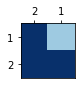

In [50]:
game = solution_f(list(bars.values()))
game.show()

In [147]:
# create the game engine
clues5x5 = {
    'rows': [1, 2, 2, 3, 5],
    'cols': [5, 4, 3, 1, 1]
}
puzzle5x5 = Puzzle(clues5x5)
solution5x5 = np.array([[1, 0, 0, 0, 0],
                        [1, 1, 0, 0, 0],
                        [1, 1, 0, 0, 0],
                        [1, 1, 1, 0, 0],
                        [1, 1, 1, 1, 1]])


In [148]:
def minimize_cells_errors(cells, puzzle=None, verbose=True):
    # minimizing the error when validated by board
    game = NonoGameEngine(puzzle)
    game.submit(cells)
    
    fitness = game.count_errors()
    if verbose:
        game.show()
    return fitness

In [126]:
from functools import partial
min_f = partial(minimize_cells_errors, puzzle=puzzle5x5, verbose=False)

In [138]:
from ecabc import ABC

nb_cells = puzzle5x5.width * puzzle5x5.height

abc = ABC(nb_cells, min_f)
for cell in range(nb_cells):
    abc.add_param(0, 1, name=f'Cell_{cell}') 
    
abc.initialize()
max_trials = 100
trial = 0
while trial < max_trials and abc.best_ret_val > 0:
    trial += 1
    abc.search()
    if trial % 10 == 0:
        print('Average fitness: {}'.format(abc.average_fitness))
        print('Average obj. fn. return value: {}'.format(abc.average_ret_val))
        print('Best fitness score: {}'.format(abc.best_fitness))
        print('Best obj. fn. return value: {}'.format(abc.best_ret_val))
        print('Best parameters: {}\n'.format(abc.best_params))

print('trial: {}'.format(trial))
print('Best obj. fn. return value: {}'.format(abc.best_ret_val))
print('Best parameters: {}\n'.format(abc.best_params))

Average fitness: 0.0714285714285715
Average obj. fn. return value: 13.0
Best fitness score: 0.07142857142857142
Best obj. fn. return value: 13
Best parameters: {'Cell_0': 0, 'Cell_1': 0, 'Cell_2': 0, 'Cell_3': 0, 'Cell_4': 0, 'Cell_5': 0, 'Cell_6': 0, 'Cell_7': 0, 'Cell_8': 0, 'Cell_9': 0, 'Cell_10': 0, 'Cell_11': 0, 'Cell_12': 0, 'Cell_13': 0, 'Cell_14': 0, 'Cell_15': 0, 'Cell_16': 0, 'Cell_17': 0, 'Cell_18': 0, 'Cell_19': 0, 'Cell_20': 0, 'Cell_21': 0, 'Cell_22': 0, 'Cell_23': 0, 'Cell_24': 0}

Average fitness: 0.0714285714285715
Average obj. fn. return value: 13.0
Best fitness score: 0.07142857142857142
Best obj. fn. return value: 13
Best parameters: {'Cell_0': 0, 'Cell_1': 0, 'Cell_2': 0, 'Cell_3': 0, 'Cell_4': 0, 'Cell_5': 0, 'Cell_6': 0, 'Cell_7': 0, 'Cell_8': 0, 'Cell_9': 0, 'Cell_10': 0, 'Cell_11': 0, 'Cell_12': 0, 'Cell_13': 0, 'Cell_14': 0, 'Cell_15': 0, 'Cell_16': 0, 'Cell_17': 0, 'Cell_18': 0, 'Cell_19': 0, 'Cell_20': 0, 'Cell_21': 0, 'Cell_22': 0, 'Cell_23': 0, 'Cell_24': 

In [130]:
cells = abc.best_params
cells.values()

dict_values([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

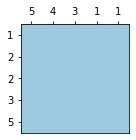

False

In [131]:
game = SolvedNonoGameEngine(puzzle5x5, solution5x5)
game.submit(cells.values(), apply=False)
game.show()
game.is_solved()

In [153]:
# create the game engine
clues5x5 = {
    'rows': [1, 2, 2, 3, 5],
    'cols': [5, 4, 3, 1, 1]
}
puzzle5x5 = Puzzle(clues5x5)

xoooo
xxooo
xxooo
xxxoo
xxxxx

In [154]:
from functools import partial
solution_f = partial(solution, puzzle=puzzle5x5, verbose=False)
min_f = partial(minimize_errors, solution_func=solution_f, verbose=False)

Average fitness: 0.23464285714285715
Average obj. fn. return value: 3.6
Best fitness score: 0.5
Best obj. fn. return value: 1
Best parameters: {'Row_0': 2, 'Row_1': 0, 'Row_2': 0, 'Row_3': 0, 'Row_4': 1, 'Col_0': 4, 'Col_1': 3, 'Col_2': 3, 'Col_3': 0, 'Col_4': 4}

Average fitness: 0.2833333333333333
Average obj. fn. return value: 2.8
Best fitness score: 0.5
Best obj. fn. return value: 1
Best parameters: {'Row_0': 2, 'Row_1': 4, 'Row_2': 0, 'Row_3': 0, 'Row_4': 2, 'Col_0': 3, 'Col_1': 1, 'Col_2': 4, 'Col_3': 4, 'Col_4': 1}

Average fitness: 0.3158333333333333
Average obj. fn. return value: 2.45
Best fitness score: 0.5
Best obj. fn. return value: 1
Best parameters: {'Row_0': 2, 'Row_1': 4, 'Row_2': 0, 'Row_3': 0, 'Row_4': 2, 'Col_0': 3, 'Col_1': 1, 'Col_2': 4, 'Col_3': 4, 'Col_4': 1}

Average fitness: 0.33499999999999996
Average obj. fn. return value: 2.2
Best fitness score: 0.5
Best obj. fn. return value: 1
Best parameters: {'Row_0': 2, 'Row_1': 4, 'Row_2': 0, 'Row_3': 0, 'Row_4': 2, 'C

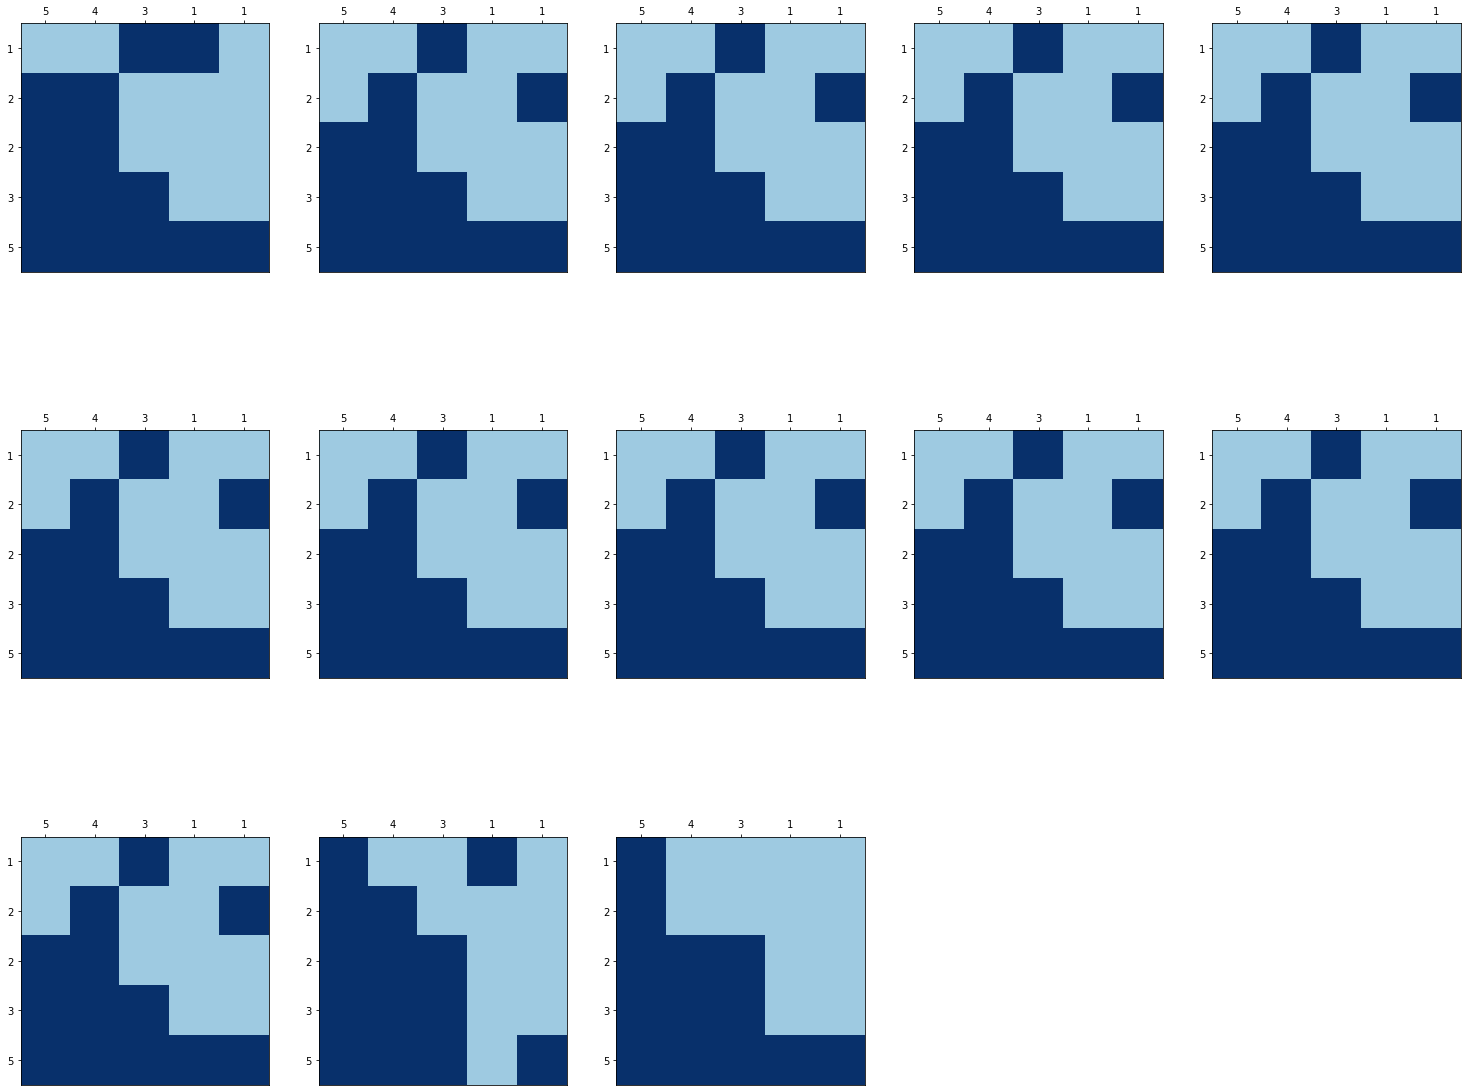

In [157]:
from ecabc import ABC

nb_bars = puzzle5x5.width + puzzle5x5.height
abc = ABC(nb_bars, min_f)
for row in range(puzzle5x5.width):
    abc.add_param(0, puzzle5x5.height, name=f'Row_{row}') 
for col in range(puzzle5x5.height):
    abc.add_param(0, puzzle5x5.width, name=f'Col_{col}') 

abc.initialize()

game = NonoGameEngine(puzzle5x5, track=True)

max_trials = 200
trial = 0
while trial < max_trials and abc.best_ret_val > 0:
    trial += 1
    abc.search()
    if trial % 10 == 0:
        tmp_game = solution_f(list(abc.best_params.values()))
        game.submit(tmp_game.board.states)

        print('Average fitness: {}'.format(abc.average_fitness))
        print('Average obj. fn. return value: {}'.format(abc.average_ret_val))
        print('Best fitness score: {}'.format(abc.best_fitness))
        print('Best obj. fn. return value: {}'.format(abc.best_ret_val))
        print('Best parameters: {}\n'.format(abc.best_params))

print('trial: {}'.format(trial))
print('Best obj. fn. return value: {}'.format(abc.best_ret_val))
print('Best parameters: {}\n'.format(abc.best_params))
game.show_all()

In [ ]:
# TODO graph error

In [158]:
bars = abc.best_params
bars

{'Row_0': 0,
 'Row_1': 5,
 'Row_2': 1,
 'Row_3': 5,
 'Row_4': 3,
 'Col_0': 1,
 'Col_1': 1,
 'Col_2': 2,
 'Col_3': 4,
 'Col_4': 4}

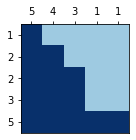

True

In [159]:
game = solution_f(list(bars.values()))
game.show()
game.is_solved()

In [106]:
game.count_errors()

0

## 8.3. Wrap up
TODO

What works:
- it is simple to design and implement
- pretty easy to use
- it works on a numpy which will make it easy to compute rules

Limitation:
- May be overkill for this simple problem


This prrof of concept is 

Computations in the error function may use reshape and np.sum to cimpute sums on X. And then compare each sums to each clue in order to compute the abs error sum element by element. 

In [ ]:
states = np.array([1, 0, 1, 1]).reshape(2,2)
states

In [ ]:
states.sum(axis=0) # O col

In [ ]:
states.sum(axis=1) # 1 col

- Ideation: 10mn
- Design: 10mn - feature out that X is a numpty arry
- Implementation: 20mn  - error function (but only sum up, not real rules, estimated to 1h)